Enem - Comparação de notas com o acesso à cultura

A partir da prova de 2009 o enem passou a ter 180 questões e ser separada em dois dias, como é hoje em dia. De 1988 a 2008 a prova tinha 63 questões e acontecia em apenas um dia. Teremos duas análises, uma até 2008 e outra a partir de 2009.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from math import *
from scipy.stats import *

In [2]:
dadosnota2015 = pd.read_csv('MICRODADOS_ENEM_2015.csv', encoding="latin1", sep=',')
#dadosquest2012 = pd.read_csv('enem2012\QUESTIONARIO_ENEM_2012.csv', encoding="latin1", sep=',')

In [3]:
#dados12 = dadosnota2012.loc[:,["NU_ANO","NU_INSCRICAO","NU_NOTA_OBJETIVA","NU_NOTA_GLOBAL_REDACAO"]] & dadosquest2012.loc[:,["Q27","Q34","Q36","Q64","Q73","Q88","Q89","Q90","Q91","Q135"]] 
dados15 = dadosnota2015.loc[:,["NU_ANO","NU_INSCRICAO","NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO","Q001",'Q002','Q003','Q004','Q005','Q006']]

In [4]:
DADOS15 = dados15[pd.notnull(dados15.NU_ANO)&pd.notnull(dados15.NU_INSCRICAO)&pd.notnull(dados15.NU_NOTA_CN)&pd.notnull(dados15.NU_NOTA_CH)&pd.notnull(dados15.NU_NOTA_LC)&pd.notnull(dados15.NU_NOTA_MT)&pd.notnull(dados15.Q001)&pd.notnull(dados15.Q002)&pd.notnull(dados15.Q003)&pd.notnull(dados15.Q004)&pd.notnull(dados15.Q005)&pd.notnull(dados15.Q006)]


In [5]:
DADOS15.Q001 = DADOS15.Q001.astype('category')
DADOS15.Q001.cat.categories = (['NUNCA', '5ANO INCOMPLETO','9ANO INCOMPLETO','EM INCOMPLETO','FACULDADE INCOMPLETA','PÓS INCOMPLETA','COMPLETOU PÓS','NÃO SEI'])
DADOS15.Q002 = DADOS15.Q002.astype('category')
DADOS15.Q002.cat.categories = (['NUNCA', '5ANO INCOMPLETO','9ANO INCOMPLETO','EM INCOMPLETO','FACULDADE INCOMPLETA','PÓS INCOMPLETA','COMPLETOU PÓS','NÃO SEI'])
DADOS15.Q003 = DADOS15.Q003.astype('category')
DADOS15.Q003.cat.categories = (['LAVRADOR...', 'DIARISTA, VIGILANTE...','PADEIRO, MECÂNICO(A)','PROFESSOR, CORRETOR...','MÉDICO, ENGENHEIRO...','NÃO SEI'])
DADOS15.Q004 = DADOS15.Q004.astype('category')
DADOS15.Q004.cat.categories = (['LAVRADOR...', 'DIARISTA, VIGILANTE...','PADEIRO, MECÂNICO(A)','PROFESSOR, CORRETOR...','MÉDICO, ENGENHEIRO...','NÃO SEI'])
DADOS15.Q006 = DADOS15.Q006.astype('category')
DADOS15.Q006.cat.categories = (['NENHUMA', 'ATÉ 788','ATÉ 1182','ATÉ 1572','ATÉ1970','ATÉ 2364', 'ATÉ 3152','ATÉ 3940','ATÉ 4728','ATÉ 5516', 'ATÉ 6304', 'ATÉ 7092','ATÉ 7880','ATÉ 9456','ATÉ 11820', 'ATÉ 15760','ACIMA DE 15760'])


DADOS15.head()

C:\Users\manucirne\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,NU_ANO,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006
0,2015,150000000376,657.4,705.3,591.1,732.3,760.0,NUNCA,NUNCA,LAVRADOR...,LAVRADOR...,3.0,ATÉ 1572
2,2015,150000001161,528.5,531.1,511.3,566.5,640.0,FACULDADE INCOMPLETA,9ANO INCOMPLETO,"PROFESSOR, CORRETOR...","DIARISTA, VIGILANTE...",3.0,ATÉ 788
4,2015,150000001219,679.9,730.6,621.2,732.4,800.0,5ANO INCOMPLETO,9ANO INCOMPLETO,"PADEIRO, MECÂNICO(A)",LAVRADOR...,5.0,ATÉ 3152
5,2015,150000002884,598.7,658.0,579.0,576.4,480.0,EM INCOMPLETO,9ANO INCOMPLETO,"DIARISTA, VIGILANTE...",NÃO SEI,4.0,ATÉ 2364
6,2015,150000002510,652.1,671.9,609.3,685.5,820.0,PÓS INCOMPLETA,PÓS INCOMPLETA,"MÉDICO, ENGENHEIRO...","MÉDICO, ENGENHEIRO...",3.0,ATÉ 5516


In [6]:
MEDIA = 0
MEDIA = (DADOS15.NU_NOTA_CN + DADOS15.NU_NOTA_CH + DADOS15.NU_NOTA_LC + DADOS15.NU_NOTA_MT + DADOS15.NU_NOTA_REDACAO)/5


In [7]:
DADOS15['MEDIA'] = MEDIA

C:\Users\manucirne\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [8]:
DADOS15.columns = ["ANO","INSCRICAO","NOTA_CN","NOTA_CH","NOTA_LC","NOTA_MT","NOTA_REDACAO","ESTUDO_PAI","ESTUDO_MÃE","TRABALHO_PAI","TRABALHO_MAE","MORADORES_CASA","RENDA_FAMILIAR","MEDIA_NOTAS"]

In [9]:
DADOS15.head()

,ANO,INSCRICAO,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_REDACAO,ESTUDO_PAI,ESTUDO_MÃE,TRABALHO_PAI,TRABALHO_MAE,MORADORES_CASA,RENDA_FAMILIAR,MEDIA_NOTAS
0,2015,150000000376,657.4,705.3,591.1,732.3,760.0,NUNCA,NUNCA,LAVRADOR...,LAVRADOR...,3.0,ATÉ 1572,689.22
2,2015,150000001161,528.5,531.1,511.3,566.5,640.0,FACULDADE INCOMPLETA,9ANO INCOMPLETO,"PROFESSOR, CORRETOR...","DIARISTA, VIGILANTE...",3.0,ATÉ 788,555.48
4,2015,150000001219,679.9,730.6,621.2,732.4,800.0,5ANO INCOMPLETO,9ANO INCOMPLETO,"PADEIRO, MECÂNICO(A)",LAVRADOR...,5.0,ATÉ 3152,712.82
5,2015,150000002884,598.7,658.0,579.0,576.4,480.0,EM INCOMPLETO,9ANO INCOMPLETO,"DIARISTA, VIGILANTE...",NÃO SEI,4.0,ATÉ 2364,578.42
6,2015,150000002510,652.1,671.9,609.3,685.5,820.0,PÓS INCOMPLETA,PÓS INCOMPLETA,"MÉDICO, ENGENHEIRO...","MÉDICO, ENGENHEIRO...",3.0,ATÉ 5516,687.76


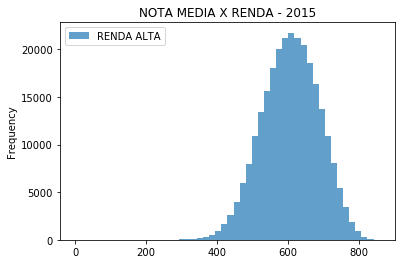

In [10]:
# ct1 = pd.crosstab(DADOS15.RENDA_FAMILIAR, DADOS15.MEDIA_NOTAS)
# ct1.plot(kind='bar', color=('yellow', 'salmon'))
# plt.ylabel('RENDA FAMILIAR')
DADOS15_RB = DADOS15[((DADOS15.RENDA_FAMILIAR) == 'NENHUMA')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 788')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 1182')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 1572')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ1970')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 2364')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 3152')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 3940')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 4728')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 5516')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 6304')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 7092')]
DADOS15_RA = DADOS15[((DADOS15.RENDA_FAMILIAR) == 'ATÉ 7880')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 9456')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 11820')|((DADOS15.RENDA_FAMILIAR) == 'ATÉ 15760')|((DADOS15.RENDA_FAMILIAR) == 'ACIMA DE 15760')]
PLOT1 = DADOS15_RA.MEDIA_NOTAS.plot.hist(bins=50,title='NOTA MEDIA X RENDA - 2015', alpha=0.7, label='RENDA ALTA')
plt.legend()

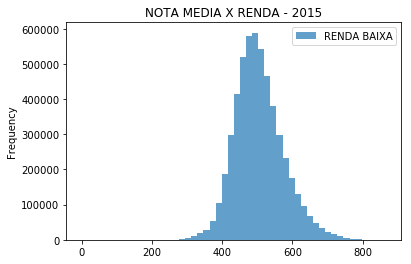

In [11]:
PLOT1 = DADOS15_RB.MEDIA_NOTAS.plot.hist(bins = 50,title='NOTA MEDIA X RENDA - 2015', alpha=0.7, label='RENDA BAIXA')
plt.legend()

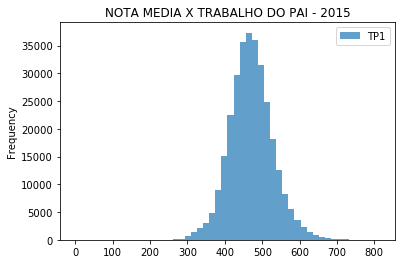

In [12]:
DADOS15_TP1 = DADOS15[((DADOS15.ESTUDO_PAI) == 'NUNCA')|((DADOS15.RENDA_FAMILIAR) == '5ANO INCOMPLETO')|((DADOS15.RENDA_FAMILIAR) == '9ANO INCOMPLETO')|((DADOS15.RENDA_FAMILIAR) == 'EM INCOMPLETO')]
DADOS15_TP2 = DADOS15[((DADOS15.ESTUDO_PAI) == 'FACULDADE INCOMPLETA')|((DADOS15.RENDA_FAMILIAR) == 'PÓS INCOMPLETA')|((DADOS15.RENDA_FAMILIAR) == 'COMPLETOU PÓS')]
PLOT1 = DADOS15_TP1.MEDIA_NOTAS.plot.hist(bins = 50,title='NOTA MEDIA X TRABALHO DO PAI - 2015', alpha=0.7, label='TP1')
plt.legend()


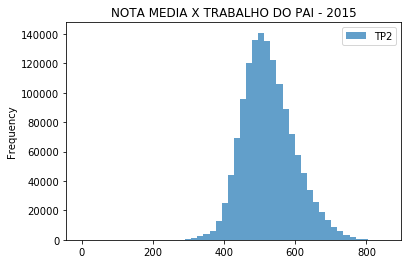

In [13]:
PLOT1 = DADOS15_TP2.MEDIA_NOTAS.plot.hist(bins = 50,title='NOTA MEDIA X TRABALHO DO PAI - 2015', alpha=0.7, label='TP2')
plt.legend()


In [16]:
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='NENHUMA'),'RENDAQT'] = 0
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 788'),'RENDAQT'] = 394
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 1182'),'RENDAQT'] = 985
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 1572'),'RENDAQT'] = 1377
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ1970'),'RENDAQT'] = 1771
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 2364'),'RENDAQT'] = 2167
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 3152'),'RENDAQT'] = 2758
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 3940'),'RENDAQT'] = 3546
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 4728'),'RENDAQT'] = 4334
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 5516'),'RENDAQT'] = 5122
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 6304'),'RENDAQT'] = 5910
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 7880'),'RENDAQT'] = 7092
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 9456'),'RENDAQT'] = 8668
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 11820'),'RENDAQT'] = 10638
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='ATÉ 15760'),'RENDAQT'] = 13790
DADOS15.loc[(DADOS15.RENDA_FAMILIAR=='MAIOR QUE 15760'),'RENDAQT'] = 20000 #ainda é um chute, mas será baseado com uma média da PNAD


C:\Users\manucirne\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\manucirne\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [33]:
pd.ols(x=DADOS15.RENDAQT, y=DADOS15.MEDIA_NOTAS)

C:\Users\manucirne\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         5484904
Number of Degrees of Freedom:   2

R-squared:         0.1737
Adj R-squared:     0.1737

Rmse:             65.0608

F-stat (1, 5484902): 1153022.0089, p-value:     0.0000

Degrees of Freedom: model 1, resid 5484902

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.0142     0.0000    1073.79     0.0000     0.0142     0.0142
     intercept   481.0281     0.0370   12986.71     0.0000   480.9555   481.1007
---------------------------------End of Summary---------------------------------

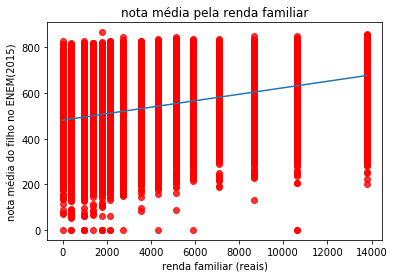

In [39]:
plt.scatter(DADOS15.RENDAQT,DADOS15.MEDIA_NOTAS, c='red', alpha=0.8)
plt.plot((DADOS15.RENDAQT.min(),DADOS15.RENDAQT.max()),(0.0142*DADOS15.RENDAQT.min()+481.0281,0.0142*DADOS15.RENDAQT.max()+481.0281))
plt.title('nota média pela renda familiar')
plt.xlabel('renda familiar (reais)')
plt.ylabel('nota média do filho no ENEM(2015)')

In [25]:
DADOS15.RENDAQT.corr( DADOS15.MEDIA_NOTAS)

0.41677595991672006

In [27]:
help(pd.ols)

Help on function ols in module pandas.stats.interface:

ols(**kwargs)
    Returns the appropriate OLS object depending on whether you need
    simple or panel OLS, and a full-sample or rolling/expanding OLS.
    
    Will be a normal linear regression or a (pooled) panel regression depending
    on the type of the inputs:
    
    y : Series, x : DataFrame -> OLS
    y : Series, x : dict of DataFrame -> OLS
    y : DataFrame, x : DataFrame -> PanelOLS
    y : DataFrame, x : dict of DataFrame/Panel -> PanelOLS
    y : Series with MultiIndex, x : Panel/DataFrame + MultiIndex -> PanelOLS
    
    Parameters
    ----------
    y: Series or DataFrame
        See above for types
    x: Series, DataFrame, dict of Series, dict of DataFrame, Panel
    weights : Series or ndarray
        The weights are presumed to be (proportional to) the inverse of the
        variance of the observations.  That is, if the variables are to be
        transformed by 1/sqrt(W) you must supply weights = 1/W
    i

In [34]:
DADOS15.loc[(DADOS15.ESTUDO_PAI=='NUNCA'),'ESTUDOPQT'] = 0
DADOS15.loc[(DADOS15.ESTUDO_PAI=='5ANO INCOMPLETO'),'ESTUDOPQT'] = 4
DADOS15.loc[(DADOS15.ESTUDO_PAI=='9ANO INCOMPLETO'),'ESTUDOPQT'] = 8
DADOS15.loc[(DADOS15.ESTUDO_PAI=='EM INCOMPLETO'),'ESTUDOPQT'] = 11
DADOS15.loc[(DADOS15.ESTUDO_PAI=='FACULDADE INCOMPLETA'),'ESTUDOPQT'] = 15
DADOS15.loc[(DADOS15.ESTUDO_PAI=='PÓS INCOMPLETA'),'ESTUDOPQT'] = 17
DADOS15.loc[(DADOS15.ESTUDO_PAI=='COMPLETOU PÓS'),'ESTUDOPQT'] = 19


C:\Users\manucirne\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\manucirne\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [35]:
pd.ols(x=DADOS15.ESTUDOPQT, y=DADOS15.MEDIA_NOTAS)

C:\Users\manucirne\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         5088867
Number of Degrees of Freedom:   2

R-squared:         0.1232
Adj R-squared:     0.1232

Rmse:             69.0124

F-stat (1, 5088865): 714987.7498, p-value:     0.0000

Degrees of Freedom: model 1, resid 5088865

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     4.7795     0.0057     845.57     0.0000     4.7684     4.7906
     intercept   463.4865     0.0645    7187.83     0.0000   463.3601   463.6129
---------------------------------End of Summary---------------------------------

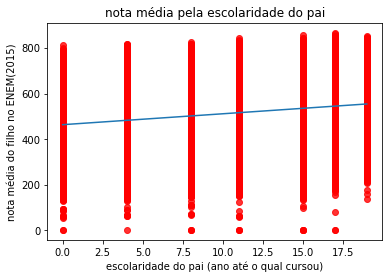

In [38]:
plt.scatter(DADOS15.ESTUDOPQT,DADOS15.MEDIA_NOTAS, c='red', alpha=0.8)
plt.plot((DADOS15.ESTUDOPQT.min(),DADOS15.ESTUDOPQT.max()),(4.7795*DADOS15.ESTUDOPQT.min()+463.4865,4.7795*DADOS15.ESTUDOPQT.max()+463.4865))
plt.title('nota média pela escolaridade do pai')
plt.xlabel('escolaridade do pai (ano até o qual cursou)')
plt.ylabel('nota média do filho no ENEM(2015)')

In [40]:
DADOS15.ESTUDOPQT.corr( DADOS15.MEDIA_NOTAS)

0.35098706195160218